<a href="https://colab.research.google.com/github/talhanadeem92/Machine_learrning/blob/main/PBL%20Lab%202%20Task%3A%20Regression%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests

# Define the API endpoint URL
api_url = 'https://api.collegefootballdata.com/games'

# Replace 'YOUR_API_KEY' with your actual API key
api_key = '/a4+IVs2LxZKGqpdJzJGYGtw+Ph22SF+Kg9UGzL68cbBdtb4LHX0yUtg7QUyt113'

# Define parameters if needed
params = {
    'year': 2014,  # Example: filter games by year
    'seasonType': 'regular',  # Example: filter games by season type
}

# Add your API key to the headers if required by the API
headers = {
    'Authorization': f'Bearer {api_key}'
}

try:
    # Send GET request to the API endpoint
    response = requests.get(api_url, headers=headers, params=params)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Parse the JSON response
        data = response.json()

        # Now you can work with the data as needed
        print(data)
    else:
        print(f"Error: {response.status_code}")
        print(response.text)

except Exception as e:
    print(f"An error occurred: {str(e)}")


[{'id': 400548974, 'season': 2014, 'week': 1, 'season_type': 'regular', 'start_date': '2014-08-23T19:30:00.000Z', 'start_time_tbd': False, 'completed': True, 'neutral_site': False, 'conference_game': False, 'attendance': None, 'venue_id': 3906, 'venue': 'Roos Field', 'home_id': 331, 'home_team': 'Eastern Washington', 'home_conference': 'Big Sky', 'home_division': 'fcs', 'home_points': 56, 'home_line_scores': [7, 14, 7, 28], 'home_post_win_prob': None, 'home_pregame_elo': None, 'home_postgame_elo': None, 'away_id': 2534, 'away_team': 'Sam Houston State', 'away_conference': 'Southland', 'away_division': 'fcs', 'away_points': 35, 'away_line_scores': [0, 21, 0, 14], 'away_post_win_prob': None, 'away_pregame_elo': None, 'away_postgame_elo': None, 'excitement_index': None, 'highlights': None, 'notes': None}, {'id': 400548403, 'season': 2014, 'week': 1, 'season_type': 'regular', 'start_date': '2014-08-27T23:00:00.000Z', 'start_time_tbd': False, 'completed': True, 'neutral_site': True, 'confer

In [2]:
import pandas as pd
df = pd.DataFrame(data)

In [3]:
df.head()

,id,season,week,season_type,start_date,start_time_tbd,completed,neutral_site,conference_game,attendance,...,away_conference,away_division,away_points,away_line_scores,away_post_win_prob,away_pregame_elo,away_postgame_elo,excitement_index,highlights,notes
0,400548974,2014,1,regular,2014-08-23T19:30:00.000Z,False,True,False,False,NaN,...,Southland,fcs,35,"[0, 21, 0, 14]",None,NaN,NaN,None,None,None
1,400548403,2014,1,regular,2014-08-27T23:00:00.000Z,False,True,True,False,10140.0,...,Southland,fcs,37,"[3, 13, 14, 7]",0.29594415265897067,NaN,NaN,9.07877961509999,None,None
2,400548402,2014,1,regular,2014-08-28T22:00:00.000Z,None,True,False,True,82847.0,...,SEC,fbs,52,"[10, 21, 14, 7]",0.9943481548066189,1765.0,1841.0,3.5531582091,None,None
3,400547829,2014,1,regular,2014-08-28T23:00:00.000Z,None,True,False,False,21003.0,...,ACC,fbs,10,"[7, 3, 0, 0]",0.01028095179585542,1377.0,1363.0,6.45099184669999,None,None
4,400548090,2014,1,regular,2014-08-28T23:00:00.000Z,False,True,False,False,9104.0,...,MEAC,fcs,0,"[0, 0, 0, 0]",0.00001918089385943844,NaN,NaN,0.3205177698,None,None


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1542 entries, 0 to 1541
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  1542 non-null   int64  
 1   season              1542 non-null   int64  
 2   week                1542 non-null   int64  
 3   season_type         1542 non-null   object 
 4   start_date          1542 non-null   object 
 5   start_time_tbd      817 non-null    object 
 6   completed           1542 non-null   bool   
 7   neutral_site        1542 non-null   bool   
 8   conference_game     1542 non-null   bool   
 9   attendance          829 non-null    float64
 10  venue_id            1542 non-null   int64  
 11  venue               1542 non-null   object 
 12  home_id             1542 non-null   int64  
 13  home_team           1542 non-null   object 
 14  home_conference     1541 non-null   object 
 15  home_division       1541 non-null   object 
 16  home_p

In [5]:
df.describe()

,id,season,week,attendance,venue_id,home_id,home_points,home_pregame_elo,home_postgame_elo,away_id,away_points,away_pregame_elo,away_postgame_elo
count,1.542000e+03,1542.0,1542.000000,829.000000,1542.000000,1542.000000,1542.000000,724.000000,724.000000,1542.000000,1542.000000,724.000000,724.000000
mean,4.005536e+08,2014.0,7.361868,42526.746683,3635.004540,1202.942931,31.107652,1517.709945,1524.798343,1326.303502,24.637484,1497.727901,1490.639503
std,9.077609e+03,0.0,4.101888,27082.640343,753.992986,1128.363422,15.127709,256.284461,264.871467,1137.781483,14.060829,256.160142,260.336156
min,4.005476e+08,2014.0,1.000000,0.000000,36.000000,2.000000,0.000000,818.000000,791.000000,2.000000,0.000000,803.000000,803.000000
25%,4.005480e+08,2014.0,4.000000,20957.000000,3662.000000,154.000000,20.000000,1313.750000,1315.000000,171.000000,14.000000,1304.000000,1289.000000
50%,4.005484e+08,2014.0,7.000000,36410.000000,3783.000000,325.000000,30.000000,1506.500000,1519.000000,2010.000000,23.000000,1487.000000,1480.500000
75%,4.005581e+08,2014.0,11.000000,59023.000000,3902.000000,2411.000000,41.000000,1718.750000,1726.250000,2443.000000,34.000000,1669.250000,1665.500000
max,4.006101e+08,2014.0,16.000000,113085.000000,4829.000000,2916.000000,86.000000,2102.000000,2232.000000,3254.000000,77.000000,2126.000000,2139.000000


In [6]:
df.isnull().sum()

id                       0
season                   0
week                     0
season_type              0
start_date               0
start_time_tbd         725
completed                0
neutral_site             0
conference_game          0
attendance             713
venue_id                 0
venue                    0
home_id                  0
home_team                0
home_conference          1
home_division            1
home_points              0
home_line_scores         0
home_post_win_prob     733
home_pregame_elo       818
home_postgame_elo      818
away_id                  0
away_team                0
away_conference         26
away_division           26
away_points              0
away_line_scores         0
away_post_win_prob     733
away_pregame_elo       818
away_postgame_elo      818
excitement_index       730
highlights            1542
notes                 1518
dtype: int64

In [7]:
# Handling missing values
df.fillna(0, inplace=True)  # Fill missing values with 0, you may use different strategies for different columns

In [8]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)

Missing Values in Each Column:
id                    0
season                0
week                  0
season_type           0
start_date            0
start_time_tbd        0
completed             0
neutral_site          0
conference_game       0
attendance            0
venue_id              0
venue                 0
home_id               0
home_team             0
home_conference       0
home_division         0
home_points           0
home_line_scores      0
home_post_win_prob    0
home_pregame_elo      0
home_postgame_elo     0
away_id               0
away_team             0
away_conference       0
away_division         0
away_points           0
away_line_scores      0
away_post_win_prob    0
away_pregame_elo      0
away_postgame_elo     0
excitement_index      0
highlights            0
notes                 0
dtype: int64


In [9]:
# Identify numerical and categorical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

In [10]:
# Impute missing values for numerical columns
for col in numerical_columns:
    df[col].fillna(df[col].mean(), inplace=True)

In [23]:
df.head()

,id,season,week,season_type,start_date,start_time_tbd,completed,neutral_site,conference_game,attendance,...,away_conference,away_division,away_points,away_line_scores,away_post_win_prob,away_pregame_elo,away_postgame_elo,excitement_index,highlights,notes
0,400548974,2014,1,regular,2014-08-23T19:30:00.000Z,False,True,False,False,0.0,...,Southland,fcs,35,"[0, 21, 0, 14]",0,0.0,0.0,0,0,0
1,400548403,2014,1,regular,2014-08-27T23:00:00.000Z,False,True,True,False,10140.0,...,Southland,fcs,37,"[3, 13, 14, 7]",0.29594415265897067,0.0,0.0,9.07877961509999,0,0
2,400548402,2014,1,regular,2014-08-28T22:00:00.000Z,0,True,False,True,82847.0,...,SEC,fbs,52,"[10, 21, 14, 7]",0.9943481548066189,1765.0,1841.0,3.5531582091,0,0
3,400547960,2014,1,regular,2014-08-28T23:00:00.000Z,False,True,False,False,0.0,...,OVC,fcs,20,"[0, 0, 0, 20]",0.09129252135430865,0.0,0.0,3.08472996929999,0,0
4,400548092,2014,1,regular,2014-08-28T23:00:00.000Z,False,True,False,False,15793.0,...,Southern,fcs,16,"[3, 13, 0, 0]",0.009681471119883822,0.0,0.0,5.7886499469,0,0


In [11]:
# Impute missing values for categorical columns
for col in categorical_columns:
    mode_value = df[col].mode().iloc[0]  # Get the mode value
    if isinstance(mode_value, list):  # Check if mode value is a list
        # Handle the situation where mode value is a list
        # For example, you can choose the first value in the list
        mode_value = mode_value[0]
    df[col] = df[col].fillna(mode_value)


In [12]:
# Convert 'start_date' column to datetime
df['start_date'] = pd.to_datetime(df['start_date'])

# Extract features from 'start_date'
df['day_of_week'] = df['start_date'].dt.dayofweek  # Day of the week (0: Monday, 6: Sunday)
df['month'] = df['start_date'].dt.month  # Month of the year (1: January, 12: December)
df['hour'] = df['start_date'].dt.hour  # Hour of the day (0-23)

# You can perform additional feature engineering based on your specific requirements and domain knowledge

# Print the head of the DataFrame to verify the new features
print(df.head())


          id  season  week season_type                start_date  \
0  400548974    2014     1     regular 2014-08-23 19:30:00+00:00   
1  400548403    2014     1     regular 2014-08-27 23:00:00+00:00   
2  400548402    2014     1     regular 2014-08-28 22:00:00+00:00   
3  400547829    2014     1     regular 2014-08-28 23:00:00+00:00   
4  400548090    2014     1     regular 2014-08-28 23:00:00+00:00   

  start_time_tbd  completed  neutral_site  conference_game  attendance  ...  \
0          False       True         False            False         0.0  ...   
1          False       True          True            False     10140.0  ...   
2              0       True         False             True     82847.0  ...   
3              0       True         False            False     21003.0  ...   
4          False       True         False            False      9104.0  ...   

   away_line_scores      away_post_win_prob  away_pregame_elo  \
0    [0, 21, 0, 14]                       0        

In [13]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the numerical features
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


In [14]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical features
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


In [15]:
df1=df

In [16]:
# Identify irrelevant columns based on your criteria
irrelevant_columns = ['start_time_tbd', 'attendance', 'venue_id', 'home_line_scores',
                      'home_post_win_prob', 'home_pregame_elo', 'home_postgame_elo',
                      'away_line_scores', 'away_post_win_prob', 'away_pregame_elo',
                      'away_postgame_elo', 'excitement_index', 'highlights', 'notes']

# Drop the irrelevant columns from your DataFrame
df1.drop(columns=irrelevant_columns, inplace=True)

In [33]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1542 entries, 0 to 1541
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   id               1542 non-null   float64            
 1   season           1542 non-null   float64            
 2   week             1542 non-null   float64            
 3   season_type      1542 non-null   object             
 4   start_date       1542 non-null   datetime64[ns, UTC]
 5   completed        1542 non-null   bool               
 6   neutral_site     1542 non-null   bool               
 7   conference_game  1542 non-null   bool               
 8   venue            1542 non-null   object             
 9   home_id          1542 non-null   float64            
 10  home_team        1542 non-null   object             
 11  home_conference  1542 non-null   object             
 12  home_division    1542 non-null   object             
 13  home_points      1

         id  season      week season_type                start_date  \
0 -0.507948     0.0 -1.551464     regular 2014-08-23 19:30:00+00:00   
1 -0.570871     0.0 -1.551464     regular 2014-08-27 23:00:00+00:00   
2 -0.570981     0.0 -1.551464     regular 2014-08-28 22:00:00+00:00   
3 -0.634124     0.0 -1.551464     regular 2014-08-28 23:00:00+00:00   
4 -0.605362     0.0 -1.551464     regular 2014-08-28 23:00:00+00:00   

   completed  neutral_site  conference_game  \
0       True         False            False   
1       True          True            False   
2       True         False             True   
3       True         False            False   
4       True         False            False   

                               venue   home_id  ... home_division home_points  \
0                         Roos Field -0.773001  ...           fcs    1.646014   
1                       Georgia Dome  0.925585  ...           fbs    0.455759   
2             Williams-Brice Stadium  1.219911 

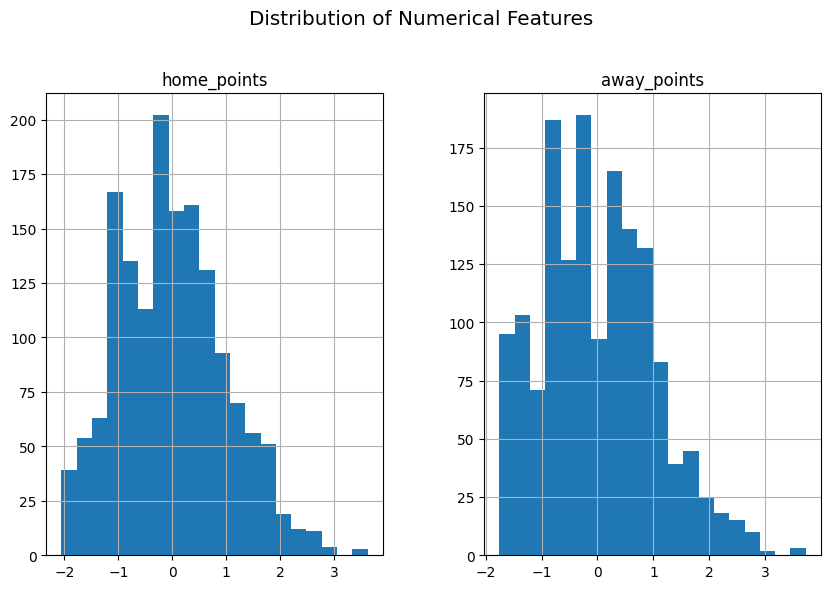

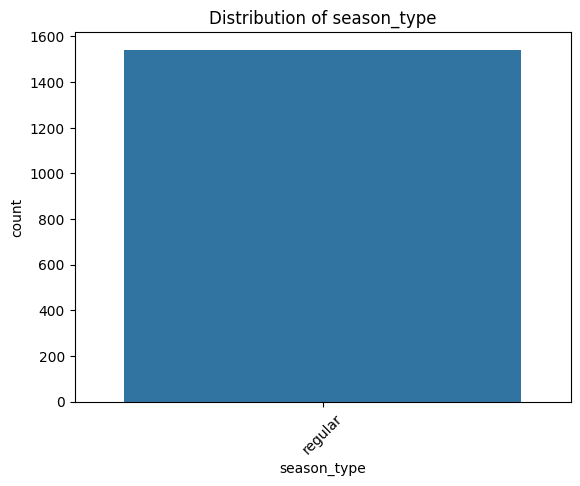

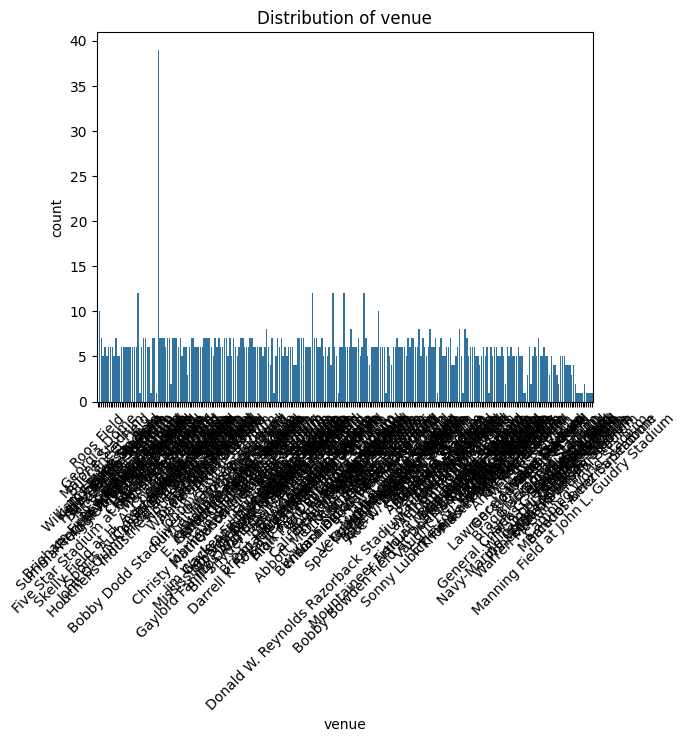

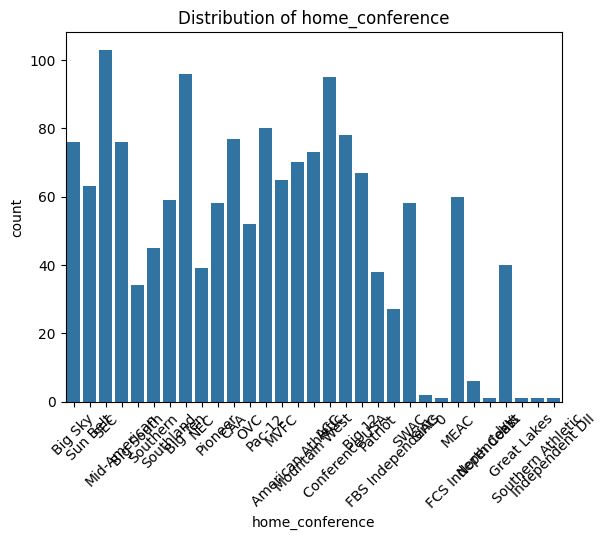

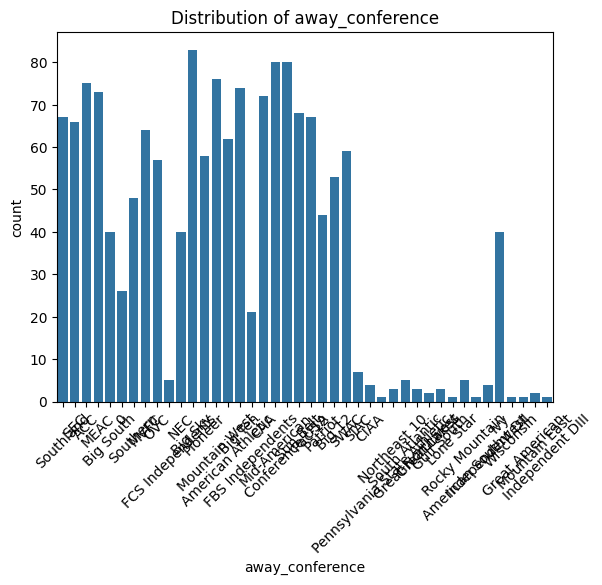

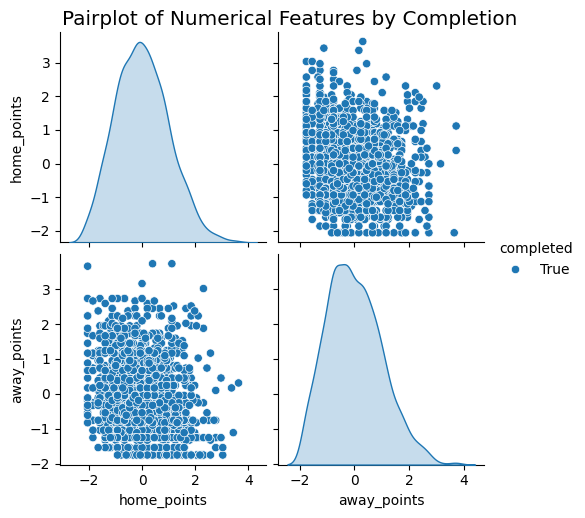

<ipython-input-17-555884158771>:34: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


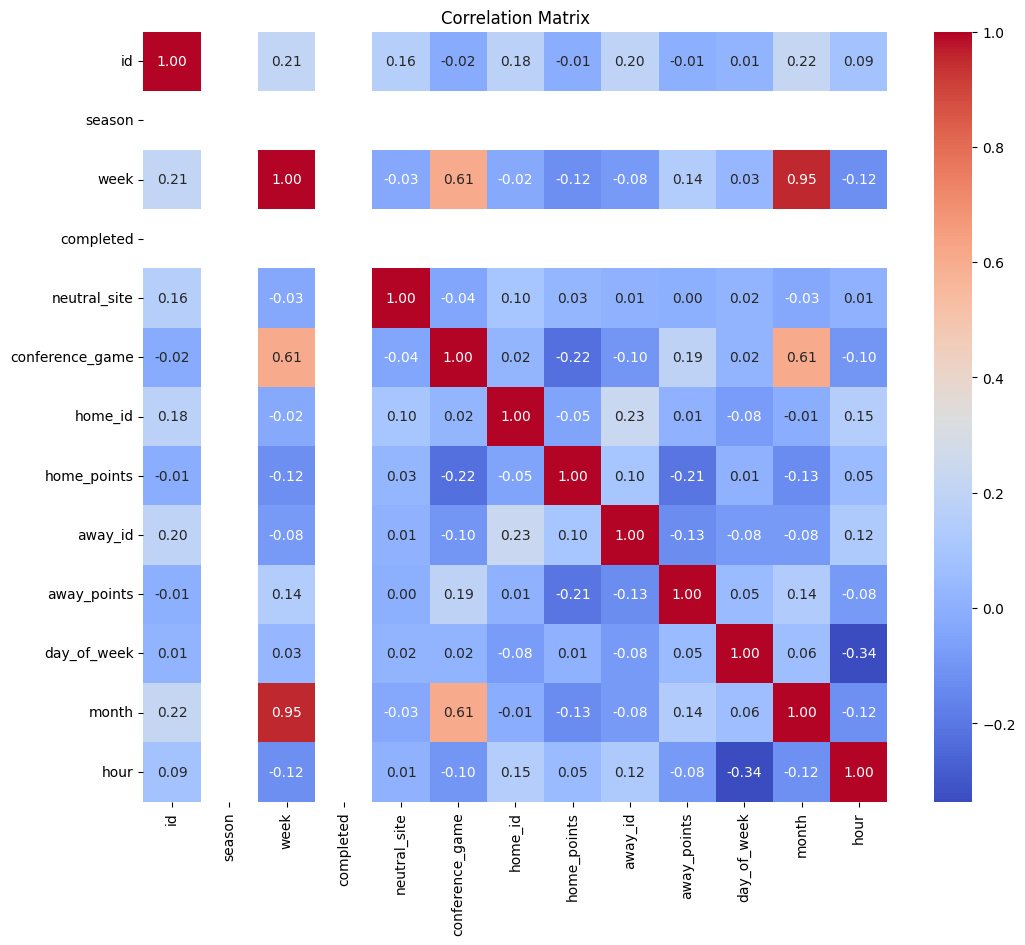

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
# Assuming the data is loaded into a DataFrame called df

# Display the first few rows of the DataFrame
print(df.head())

# Summary statistics of numerical features
print(df.describe())

# Distribution of numerical features
numerical_features = ['home_points', 'away_points']
df[numerical_features].hist(bins=20, figsize=(10, 6))
plt.suptitle('Distribution of Numerical Features', x=0.5, y=1.02, ha='center', fontsize='x-large')
plt.show()

# Distribution of categorical features
categorical_features = ['season_type', 'venue', 'home_conference', 'away_conference']
for feature in categorical_features:
    sns.countplot(x=feature, data=df)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)
    plt.show()

# Relationship between numerical features and the target variable
sns.pairplot(df, vars=numerical_features, hue='completed', diag_kind='kde')
plt.suptitle('Pairplot of Numerical Features by Completion', x=0.5, y=1.02, ha='center', fontsize='x-large')
plt.show()

# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [18]:
import pandas as pd

# Assuming df is your DataFrame
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

print("Categorical columns:")
print(categorical_columns)


Categorical columns:
['season_type', 'venue', 'home_team', 'home_conference', 'home_division', 'away_team', 'away_conference', 'away_division']


In [19]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define features and target
X = df[['home_points','away_points', 'day_of_week', 'month', 'hour']]
y = df['season_type']  # Assuming 'completed' is the target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(clf, X_train, y_train, cv=5)  # 5-fold cross-validation

print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

# Train the classifier on the entire training set
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean Accuracy: 1.0
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

     regular       1.00      1.00      1.00       309

    accuracy                           1.00       309
   macro avg       1.00      1.00      1.00       309
weighted avg       1.00      1.00      1.00       309



In [46]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define features and target
X = df[['home_points','away_points', 'day_of_week', 'month', 'hour']]
y = df['season_type']  # Assuming 'completed' is the target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

     regular       1.00      1.00      1.00       309

    accuracy                           1.00       309
   macro avg       1.00      1.00      1.00       309
weighted avg       1.00      1.00      1.00       309



In [48]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest classifier
clf = RandomForestClassifier(random_state=42)

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the classifier with the best hyperparameters
best_clf = RandomForestClassifier(**best_params, random_state=42)
best_clf.fit(X_train, y_train)

# Evaluate the model
y_pred = best_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

     regular       1.00      1.00      1.00       309

    accuracy                           1.00       309
   macro avg       1.00      1.00      1.00       309
weighted avg       1.00      1.00      1.00       309



In [49]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define features and target
X = df[['home_points','away_points', 'day_of_week', 'month', 'hour']]
y = df['season_type']  # Assuming 'completed' is the target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid with reduced values
param_grid = {
    'n_estimators': [50, 100],  # Reduced from original grid
    'max_depth': [10, 20, None],  # Reduced from original grid
    'min_samples_split': [2, 5],  # Reduced from original grid
}

# Initialize the Random Forest classifier
clf = RandomForestClassifier(random_state=42)

# Reduce the number of folds used in cross-validation
cv = 3  # Reduced from 5 for faster computation

# Perform grid search with reduced complexity
grid_search = GridSearchCV(clf, param_grid, cv=cv, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and best accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy:", best_accuracy)

# Evaluate the model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)


Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
Best Accuracy: 1.0
Test Accuracy: 1.0


In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10],  # Reducing the maximum depth of the trees
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],  # Adding minimum samples per leaf
}

# Initialize the Random Forest classifier
clf = RandomForestClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and best accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy:", best_accuracy)


Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Accuracy: 1.0


In [52]:
from sklearn.model_selection import cross_val_score
model = RandomForestClassifier(n_estimators=100)
# Perform cross-validation
scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())


Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean Accuracy: 1.0


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target variable in the training set
y_train_encoded = label_encoder.fit_transform(y_train)

# Transform the target variable in the testing set
y_test_encoded = label_encoder.transform(y_test)


In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
# Assuming your dataset is stored in a CSV file named 'dataset.csv'


# Select features (X) and target variable (y)
# Define features and target
X = df[['away_points', 'day_of_week', 'month', 'hour']]
y = df['home_points']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)


Mean Squared Error: 0.8272193386873012
Root Mean Squared Error: 0.9095159914412178
R-squared Score: 0.09036901724550872


In [65]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Compute Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Compute R-squared (R2) score
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)


Mean Squared Error (MSE): 0.8792691678137688
Root Mean Squared Error (RMSE): 0.937693536190673
Mean Absolute Error (MAE): 0.7624508141795278
R-squared (R2) Score: 0.09605216154466711


In [21]:
import joblib

# Save the trained model
joblib.dump(model, 'model.pkl')

['model.pkl']

In [22]:
from flask import Flask, request, jsonify
import joblib

# Create a Flask app
app = Flask(__name__)

# Load the pre-trained model
model = joblib.load('model.pkl')

# Define a route for making predictions
@app.route('/predict', methods=['POST'])
def predict():
    # Get the JSON data sent by the client
    data = request.get_json()

    # Make predictions using the loaded model
    predictions = model.predict(data['features'])

    # Return the predictions as JSON
    return jsonify({'predictions': predictions.tolist()})

if __name__ == '__main__':
    # Run the Flask app
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
